<a href="https://colab.research.google.com/github/chadaramakrishnareddy/chada-ramakrishna-reddy/blob/main/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [ ]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2, parser='auto')

In [ ]:
car_data.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
#Displaying feature names
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
#Getting the whole dataframe
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
type(car_data)

pandas.core.frame.DataFrame

Before doing exploratory analysis,let's get the training and test data

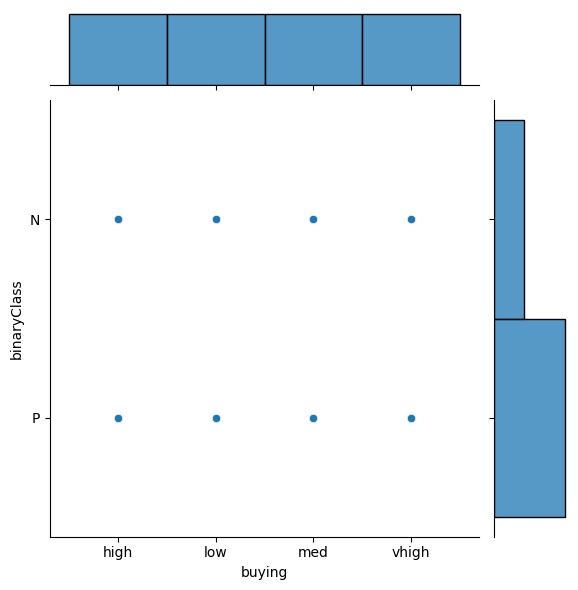

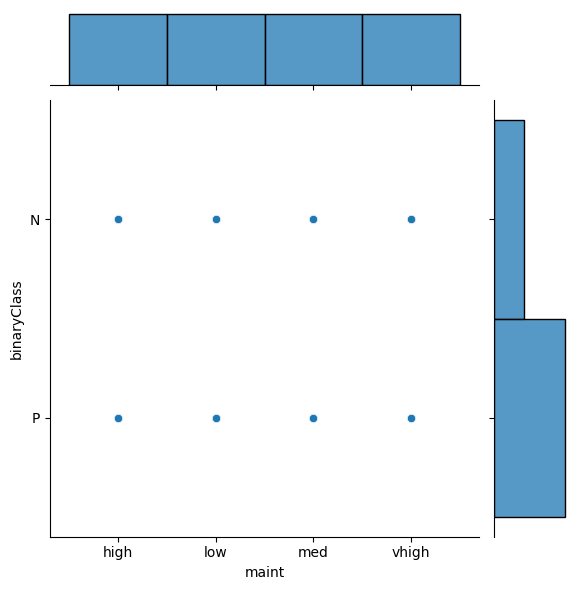

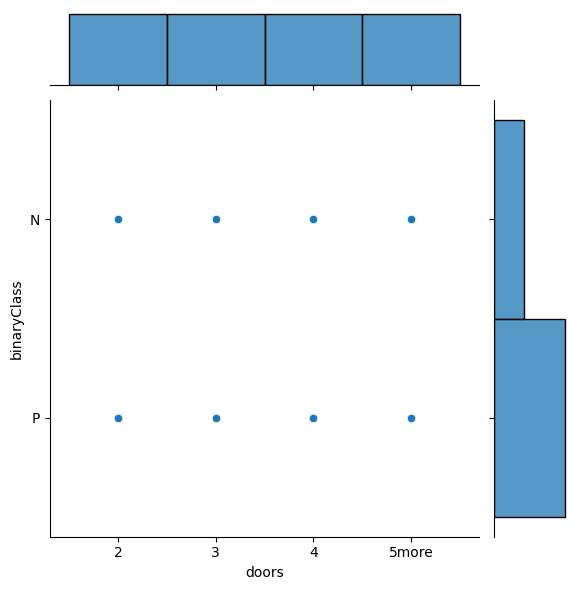

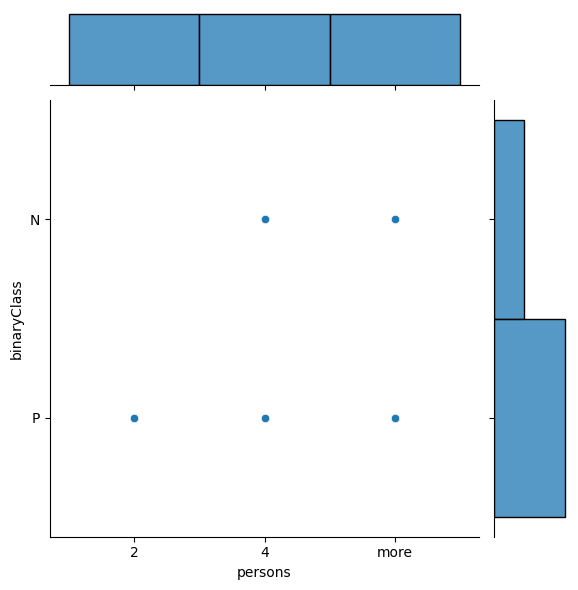

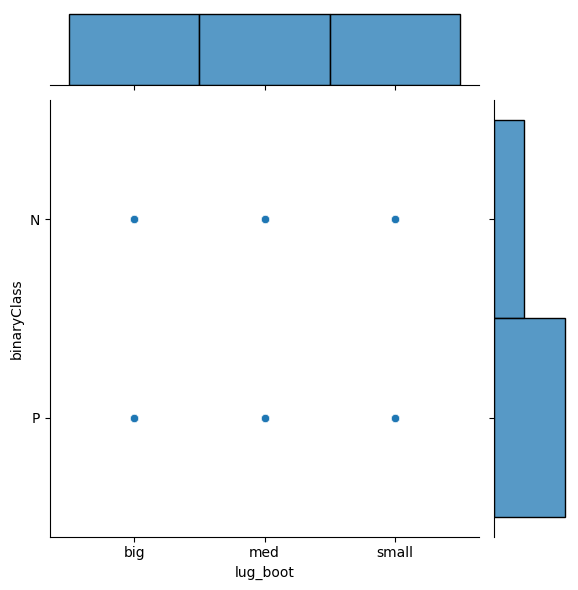

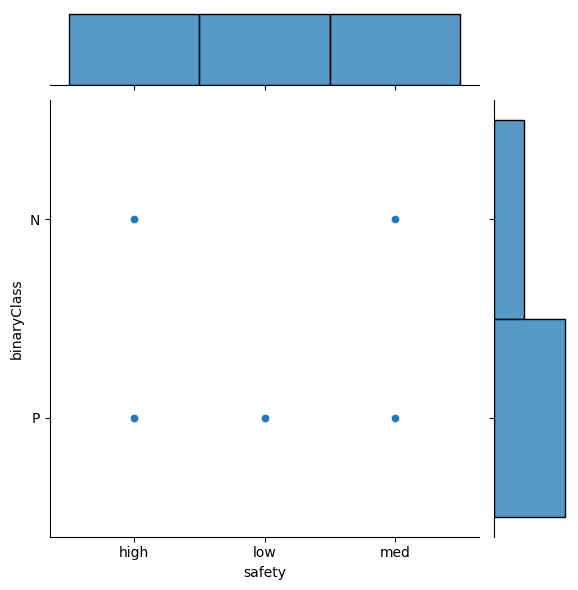

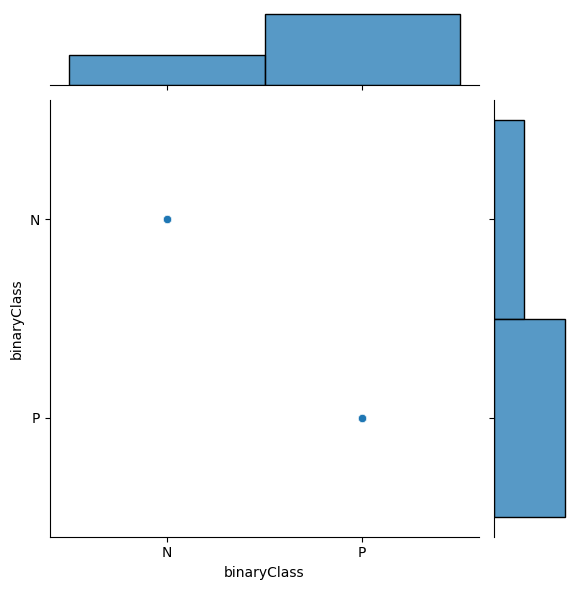

In [ ]:
l=len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i], y="binaryClass", data=car_data, palette="rainbow")

## Splitting data into  Training and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.3,random_state=20)

#print('The size of training data is:{}\nThe size of testing data is {}'.format(len(train_data),len(test_data)))
car_data.shape,train_data.shape,test_data.shape

((1728, 7), (1209, 7), (519, 7))

## Checking Summary Statistics

In [ ]:
#checking summary statistics

train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


## Checking missing values

In [ ]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


We dont have any missing values

## Checking Categorial

In [ ]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [ ]:
train_data['buying'].value_counts()

,count
buying,
med,327
high,307
vhigh,291
low,284


In [ ]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


In [ ]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


In [ ]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


<Axes: xlabel='binaryClass', ylabel='count'>

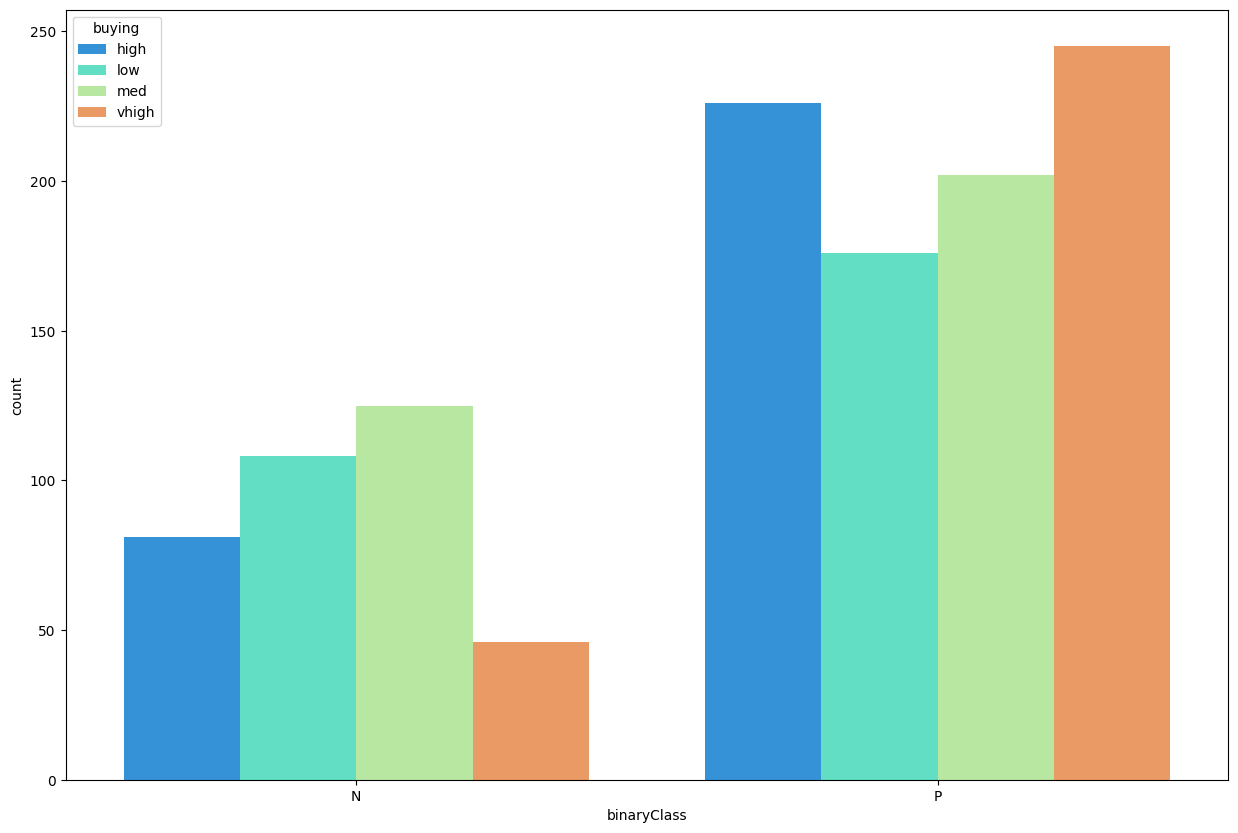

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass', hue='buying', palette="rainbow")

In [ ]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

Let's Create a pipeline to encode all features in the training input data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe=Pipeline([('ord_enc',OrdinalEncoder())])

car_train_prepared=pipe.fit_transform(car_train)

Let's also handle labels.Labels caontain P and N

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
car_train_prepared.shape, car_labels_prepared.shape

((1209, 6), (1209,))

##5-Training Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

Let's train the same model on the scaled data

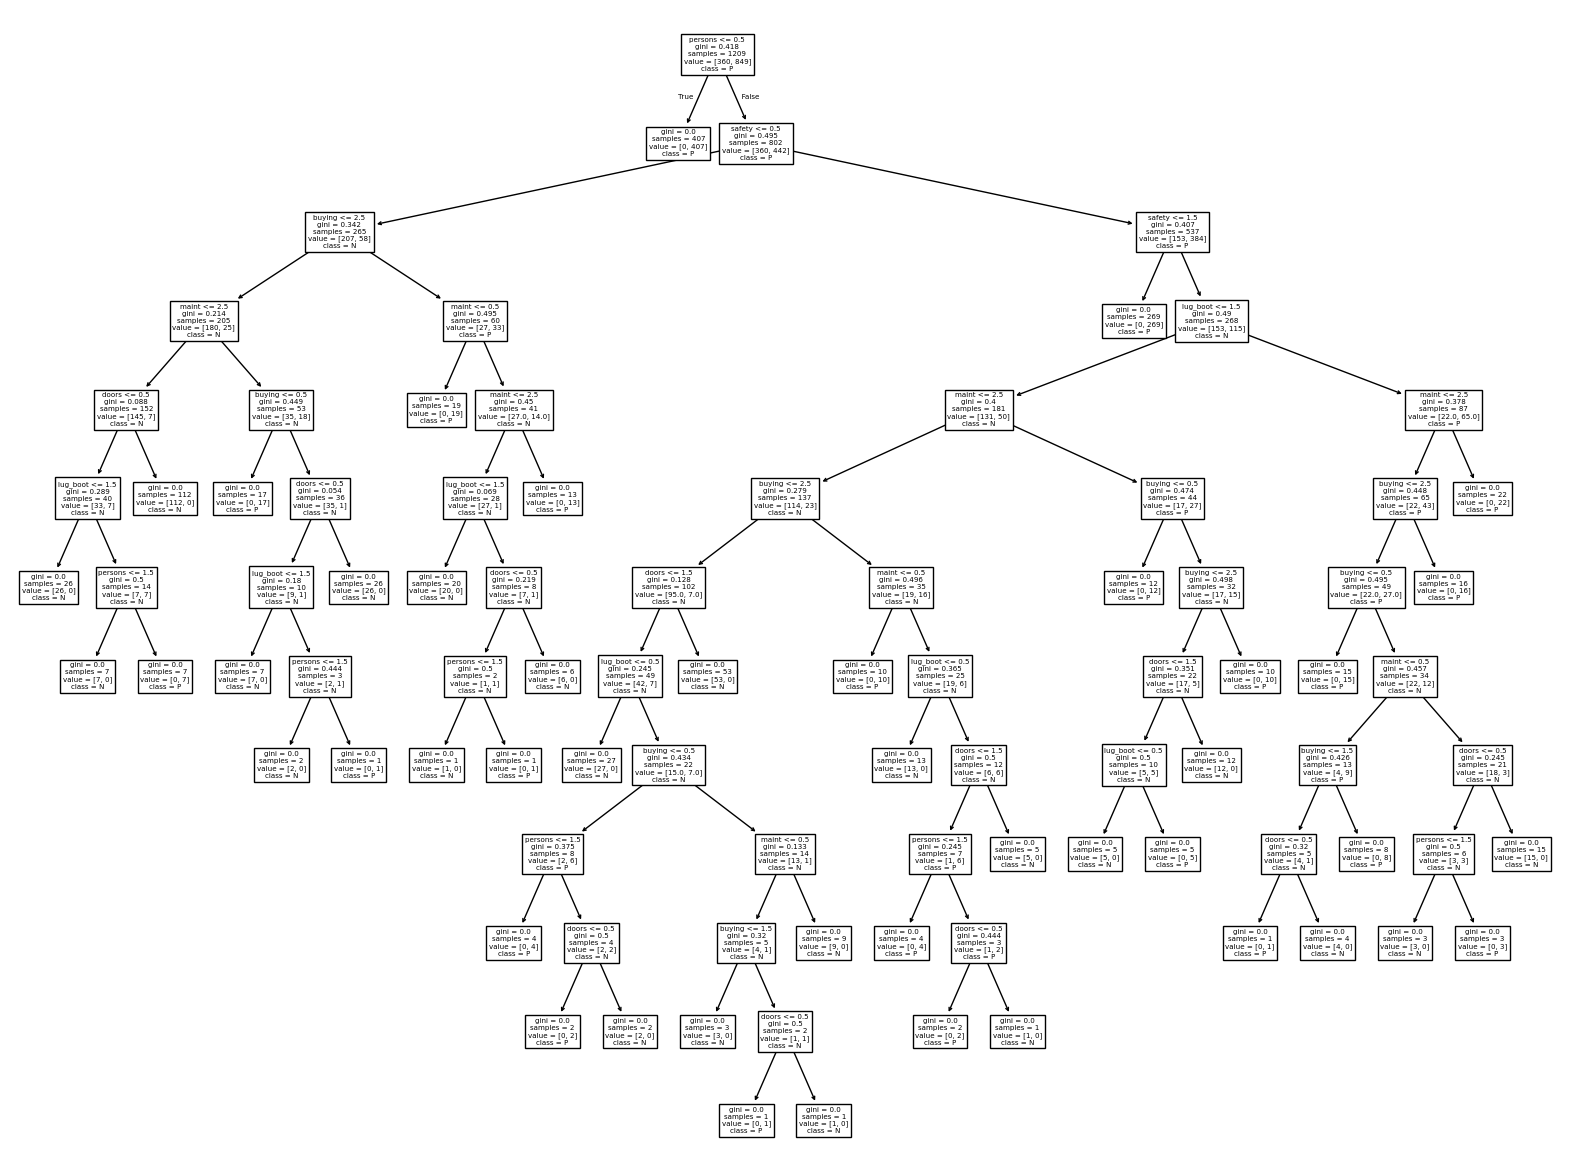

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns, class_names=['N','P']);

## Evaluating Desision Tree

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared, preds)}")
print(f"ConfusionMatrix:{confusion_matrix(car_labels_prepared, preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

ConfusionMatrix:[[360   0]
 [  0 849]]


In [ ]:
accuracy_score(car_labels_prepared, preds)

1.0